<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/13%20correlation_currency_and_inflation.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

Статья [Корреляция между курсом валюты и инфляцией](https://rostsber.ru/publish/investment/corr_infl_currency.html) на блоге "Рост Сбережений".

In [ ]:
!pip install okama

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed


import okama as ok

plt.rcParams['figure.figsize'] = [12.0, 6.0]

### Измерение корреляции со сдвигом

In [25]:
def get_lagged_corr(ccy: str = 'USDRUB.FX', first_date: str = '1990-01', last_date=None, lag=0):
    ccy_short = ok.Asset(ccy).currency
    currency_al = ok.AssetList([ccy], first_date=first_date, last_date=last_date, ccy=ccy_short, inflation=True)
    ccy_ts = currency_al.assets_ror.shift(lag)
    infl_ts = currency_al.inflation_ts
    df = pd.concat([ccy_ts, infl_ts], axis=1, join='inner').dropna()
    return df.corr().iloc[1, 0]

In [26]:
get_lagged_corr()

0.598941118861574

In [8]:
get_lagged_corr(lag=1, first_date='2012-05')

0.37021108699283106

In [9]:
def plot_lag_max_par(ccy: str = 'USDRUB.FX', first_date='2012-01', last_date=None):
    rang = range(-12, 12)
    rs = Parallel(n_jobs=-1)(delayed(get_lagged_corr)(ccy, first_date, last_date, i) for i in rang)
    s = pd.Series(rs, index=rang)
    fig, ax=plt.subplots(figsize=(14,3))
    ax.plot(s)
    ax.axvline(s.idxmax(), color='k',linestyle='--',label='Максимальная корреляция')
    ax.set(title=f'Корреляция {ccy} и Инфляции \n Максимальная корреляция = {s.max():.2f} \n сдвиг = {s.idxmax()}', xlabel='сдвиг',ylabel='Корреляция')
    plt.legend()

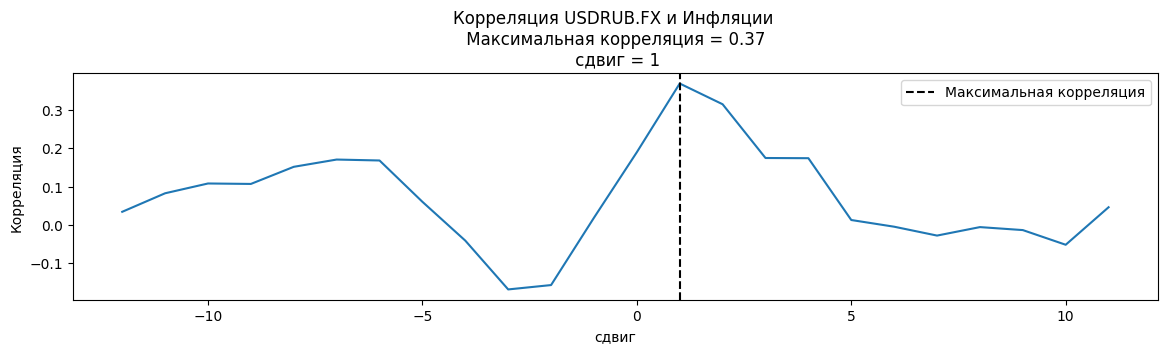

In [10]:
plot_lag_max_par()

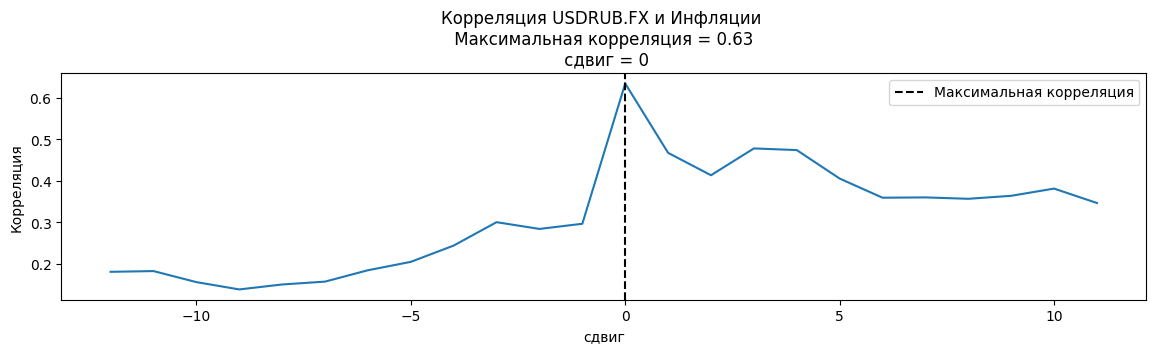

In [27]:
plot_lag_max_par(first_date='1990-01', last_date='2012-01')

In [16]:
def get_corr(ccy: str = 'USDRUB.FX', first_date: str = '2000-01', last_date=None, lag=0):
    ccy_symbol = ok.Asset(ccy).currency
    ccy_object = ok.AssetList([ccy], first_date=first_date, last_date=last_date, ccy=ccy_symbol, inflation=True)  # сколько рублей дают за один доллар
    df = pd.concat([ccy_object.assets_ror.shift(lag), ccy_object.inflation_ts], axis=1, join='outer')
    return df.corr().iloc[0, 1]

In [19]:
get_corr(first_date='1998-01', last_date='2008-01', lag=0)

0.9410309750897283

### Корреляция инфляции в других странах

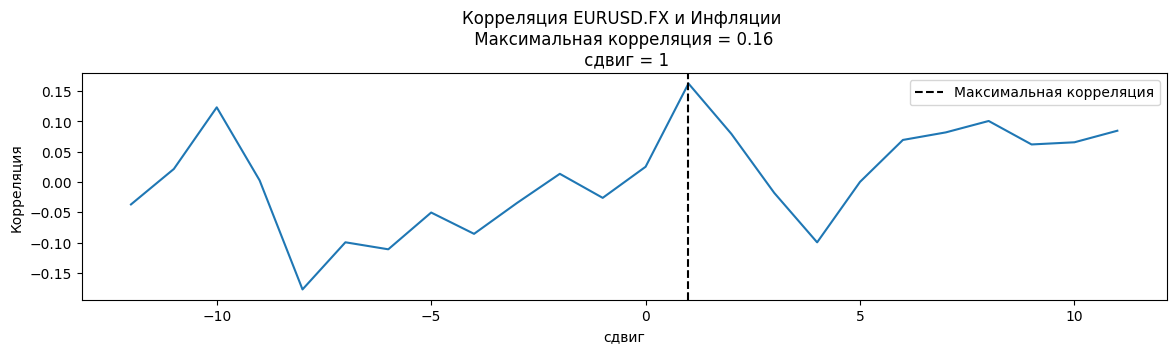

In [11]:
plot_lag_max_par(ccy='EURUSD.FX')

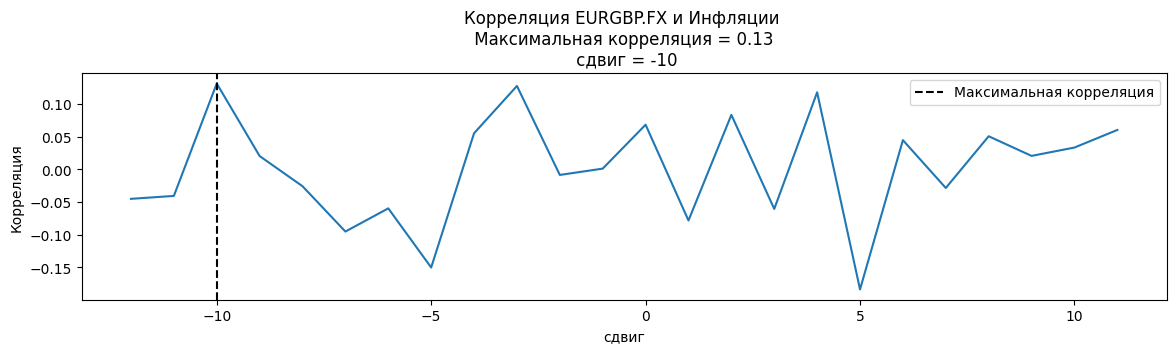

In [12]:
plot_lag_max_par(ccy='EURGBP.FX')

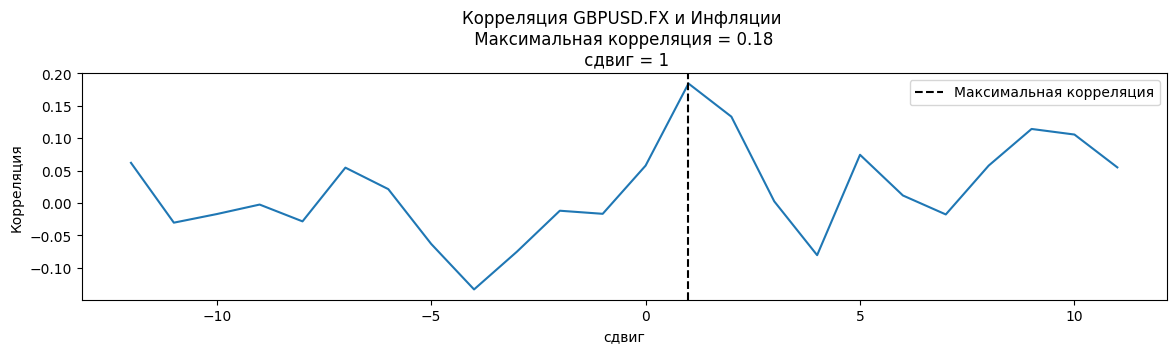

In [15]:
plot_lag_max_par(ccy='GBPUSD.FX')

### Скользящая корреляция (Rolling Correlation)

In [32]:
def plot_rolling_corr(ccy: str = 'USDRUB.FX', window: int = 10, first_date: str = '1990-01', last_date=None, lag=0):
    ccy_short = ok.Asset(ccy).currency
    usd = ok.AssetList([ccy], first_date=first_date, last_date=last_date, ccy=ccy_short, inflation=True)  
    ror = pd.concat([usd.assets_ror.shift(lag), usd.inflation_ts], axis=1, join='outer')
    cov_matrix_ts = ror.rolling(window=window * 12).corr()
    cov_matrix_ts = cov_matrix_ts.drop(index=ror.columns[1:], level=1).droplevel(1)
    cov_matrix_ts.drop(columns=ror.columns[0], inplace=True)
    cov_matrix_ts.dropna(inplace=True)
    cov_matrix_ts.plot()
    ax = plt.gca()
    ax.set_title(f'Скользящая {window}-летняя корреляция между {ccy} и инфляцией \n сдвиг = {lag}')
    ax.set_ylabel('Корреляция')
    ax.set_xlabel('')
    ax.legend('')

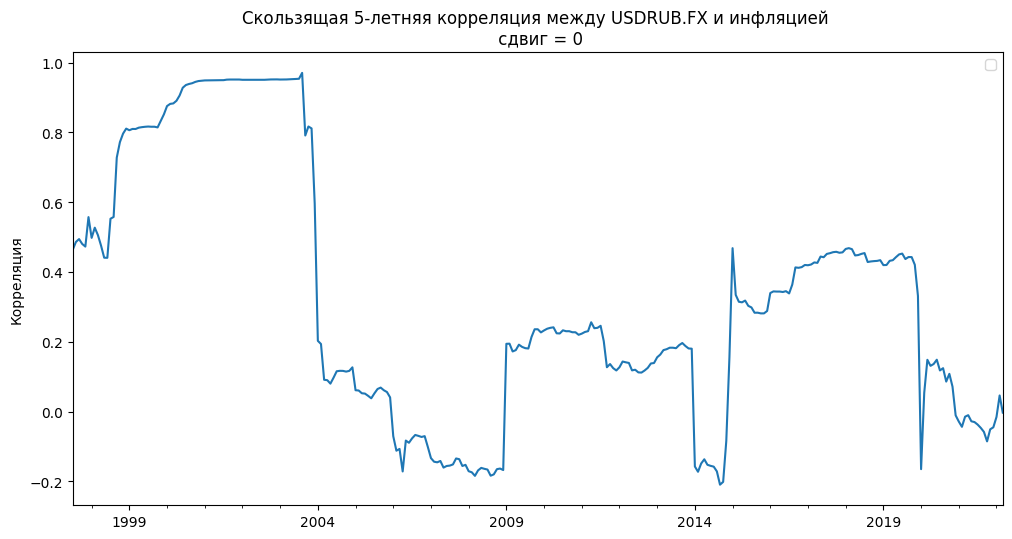

In [77]:
plot_rolling_corr(window=5, lag=0)

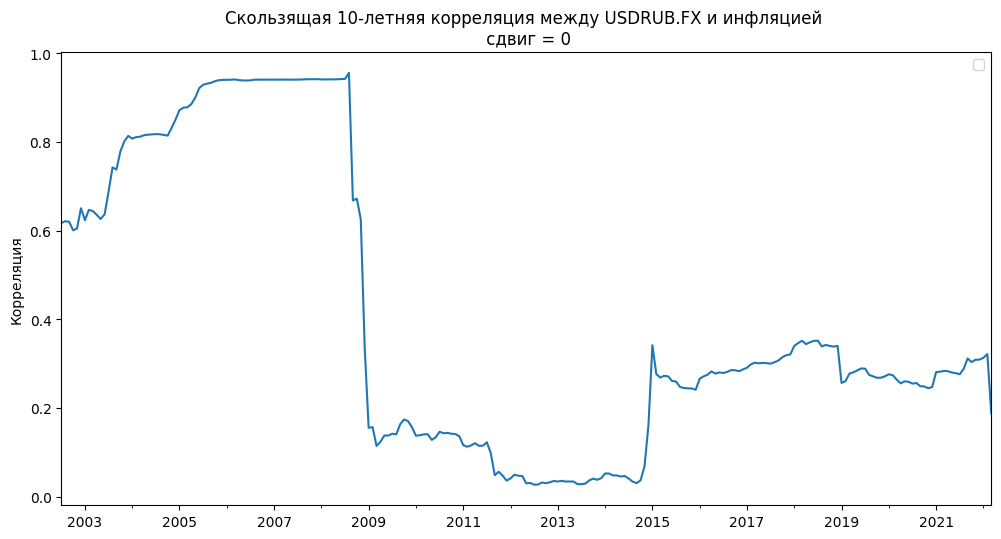

In [78]:
plot_rolling_corr(window=10, lag=0)

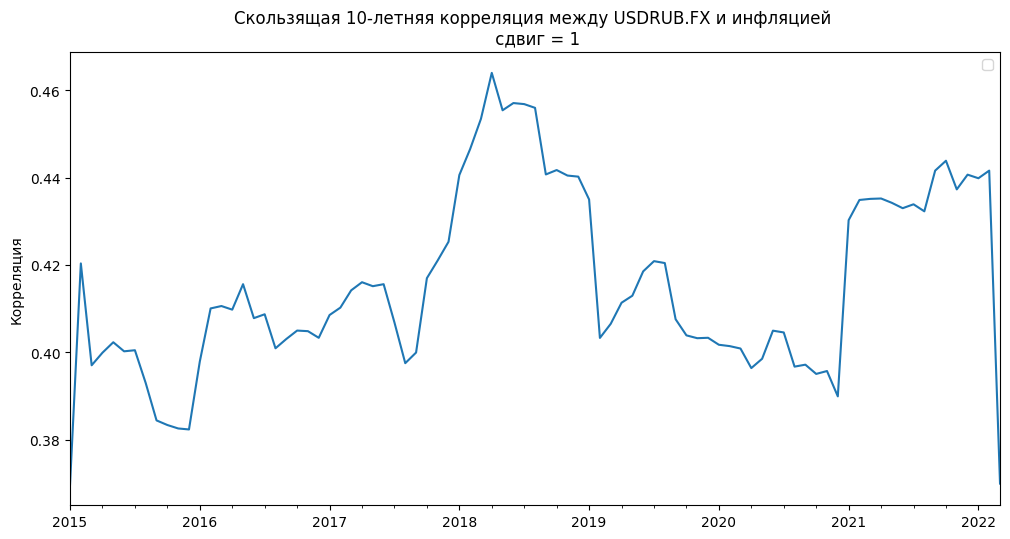

In [79]:
plot_rolling_corr(window=10, lag=1, first_date='2005-01')

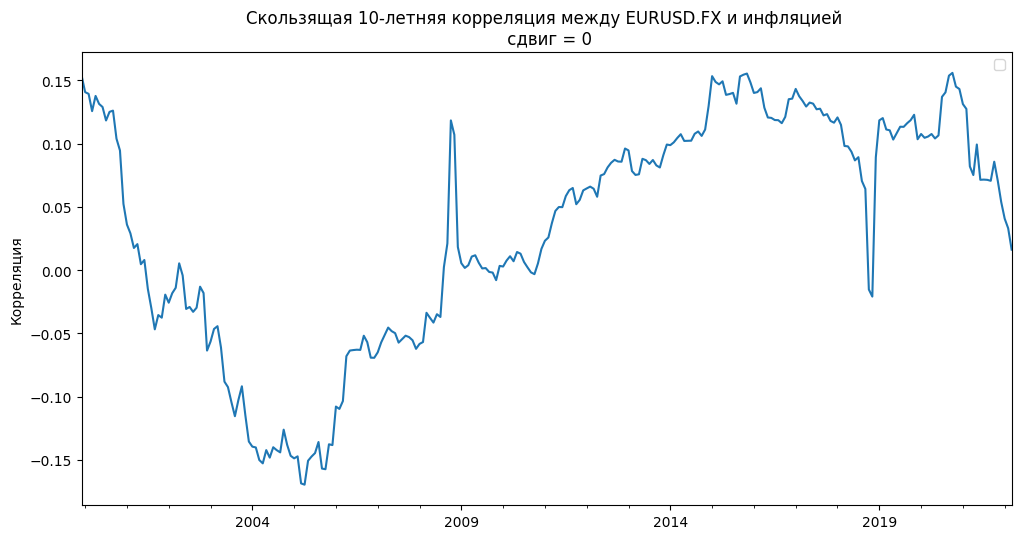

In [33]:
plot_rolling_corr(ccy='EURUSD.FX', window=10)

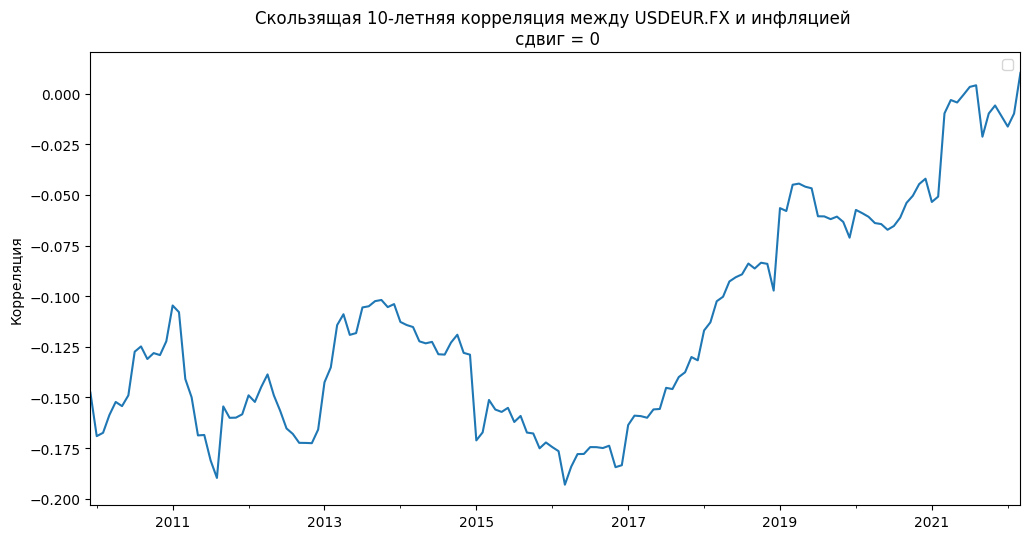

In [35]:
plot_rolling_corr(ccy='USDEUR.FX', window=10)

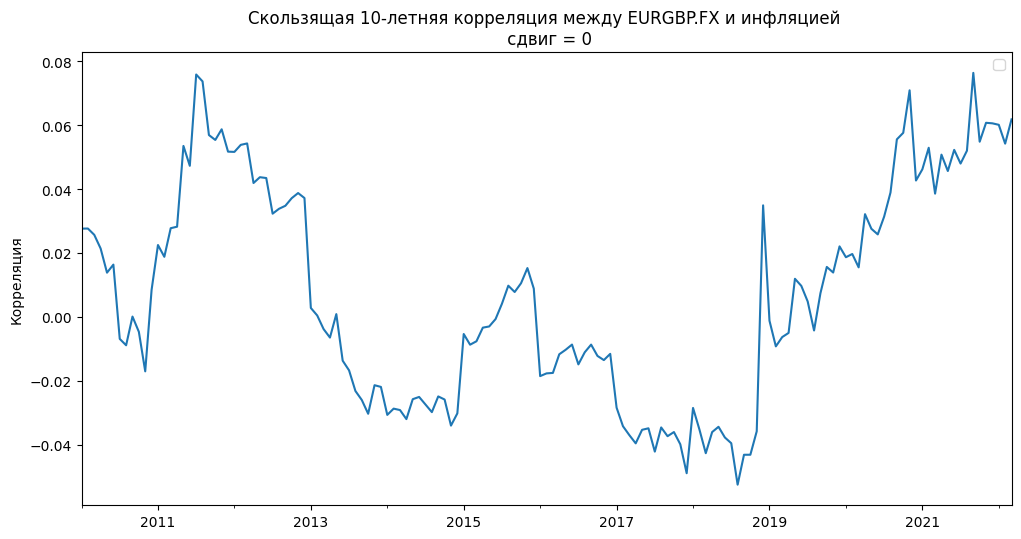

In [36]:
plot_rolling_corr(ccy='EURGBP.FX', window=10)

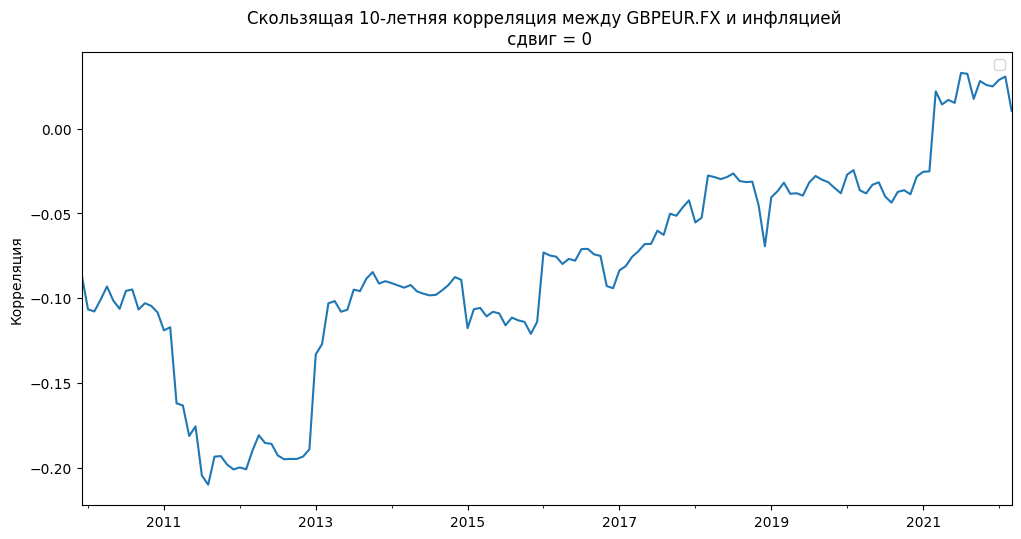

In [37]:
plot_rolling_corr(ccy='GBPEUR.FX', window=10)

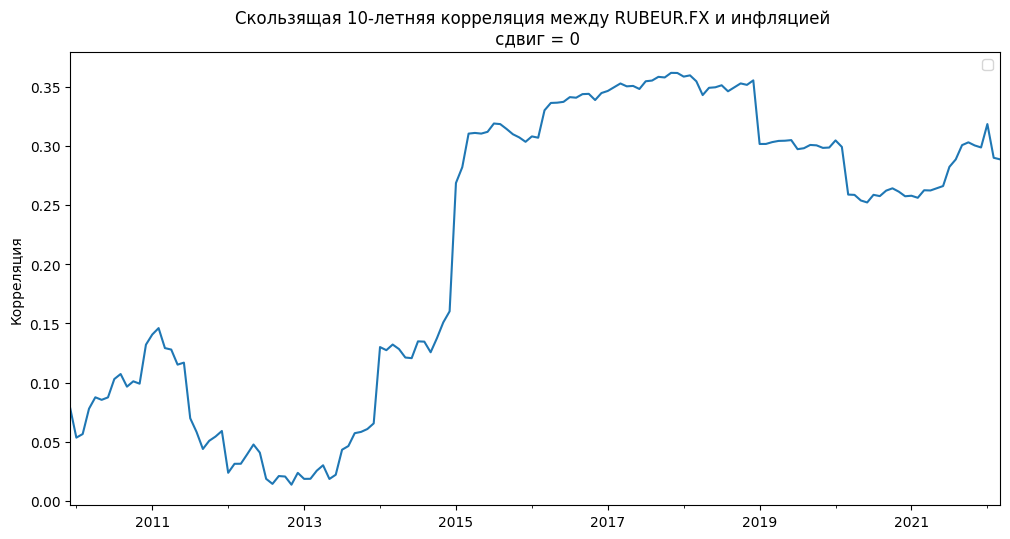

In [38]:
plot_rolling_corr(ccy='RUBEUR.FX', window=10)